In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np                      # Numerical computations
import pandas as pd                    # Data manipulation and analysis
import seaborn as sns                  # Statistical data visualization
import matplotlib.pyplot as plt        # Plotting graphs and charts

Imported Required Python libraries

# Dataset

In [2]:
train=pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv")
test=pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv")
ss=pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/sample_submission.csv")

# data types of different columns

In [3]:
train.info()
train.describe()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           40000 non-null  int64  
 1   airline      35387 non-null  object 
 2   flight       40000 non-null  object 
 3   source       40000 non-null  object 
 4   departure    35208 non-null  object 
 5   stops        37681 non-null  object 
 6   arrival      40000 non-null  object 
 7   destination  40000 non-null  object 
 8   class        40000 non-null  object 
 9   duration     36987 non-null  float64
 10  days_left    35562 non-null  float64
 11  price        40000 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left,price
0,0,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,NaN,40.0,64173
1,1,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,Economy,16.08,26.0,4357
2,2,SpiceJet,SG-8107,Delhi,Early_Morning,zero,Morning,Chennai,Economy,2.92,25.0,3251
3,3,NaN,0.00E+00,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.50,22.0,1776
4,4,Air_India,AI-569,Chennai,Early_Morning,one,Morning,Bangalore,Economy,4.83,20.0,3584


In [4]:
test.info()
test.describe()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  int64  
 1   airline      9452 non-null   object 
 2   flight       10000 non-null  object 
 3   source       10000 non-null  object 
 4   departure    9080 non-null   object 
 5   stops        9349 non-null   object 
 6   arrival      10000 non-null  object 
 7   destination  10000 non-null  object 
 8   class        10000 non-null  object 
 9   duration     9418 non-null   float64
 10  days_left    9304 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB


,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left
0,0,Vistara,UK-816,Bangalore,Morning,zero,Afternoon,Delhi,Economy,2.67,18.0
1,1,Air_India,AI-440,Chennai,Early_Morning,zero,Morning,Delhi,Economy,NaN,5.0
2,2,SpiceJet,SG-8938,Delhi,Evening,one,Evening,Bangalore,Economy,NaN,44.0
3,3,Vistara,UK-838,Chennai,Night,one,Evening,Kolkata,Business,21.00,26.0
4,4,Air_India,AI-429,Delhi,Morning,one,Evening,Mumbai,Business,7.25,22.0


# descriptive statistics of numerical columns

In [5]:
# Descriptive statistics for numerical columns
print("Descriptive statistics on Train dataset\n")
train[['duration', 'price','days_left']].describe()



Descriptive statistics on Train dataset



,duration,price,days_left
count,36987.000000,40000.00000,35562.000000
mean,12.004088,20801.49025,26.197936
std,7.108063,22729.14842,13.469232
min,0.830000,1105.00000,1.000000
25%,6.670000,4687.00000,15.000000
50%,11.080000,7353.00000,26.000000
75%,15.920000,42521.00000,38.000000
max,47.080000,114704.00000,49.000000


In [6]:
print("Descriptive statistics on Test dataset\n")
test[['duration','days_left']].describe()

Descriptive statistics on Test dataset



,duration,days_left
count,9418.000000,9304.000000
mean,12.005125,26.163156
std,7.086652,13.453717
min,0.920000,1.000000
25%,6.670000,15.000000
50%,11.170000,26.000000
75%,15.920000,38.000000
max,40.420000,49.000000


# Identify and handle the missing values

Count of missing values:

id                0
airline        4613
flight            0
source            0
departure      4792
stops          2319
arrival           0
destination       0
class             0
duration       3013
days_left      4438
price             0
dtype: int64
Visualizing missing values:



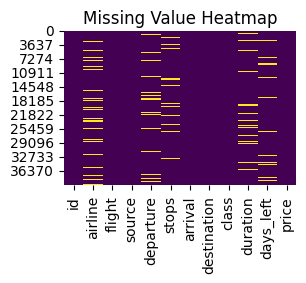

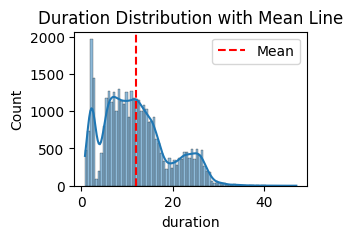

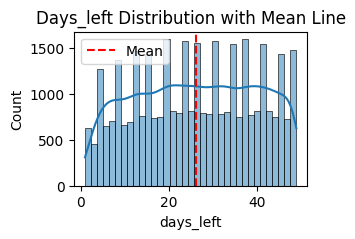

In [7]:
print("Count of missing values:\n")
# Count of missing values
missing_vals = train.isnull().sum()
print(missing_vals)

print("Visualizing missing values:\n")
# Visualize missing data
plt.figure(figsize=(3, 2))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()



# Example: Duration distribution
plt.figure(figsize=(3, 2))
sns.histplot(train['duration'], kde=True)
plt.axvline(train['duration'].mean(), color='red', linestyle='--', label='Mean')
plt.title("Duration Distribution with Mean Line")
plt.legend()
plt.show()



# Example: Duration distribution
plt.figure(figsize=(3, 2))
sns.histplot(train['days_left'], kde=True)
plt.axvline(train['days_left'].mean(), color='red', linestyle='--', label='Mean')
plt.title("Days_left Distribution with Mean Line")
plt.legend()
plt.show()


** Interpretation of the Duration Plot**
The distribution is right-skewed, meaning most durations are shorter, with a few long flights stretching the tail.

The red dashed line (mean) is slightly to the right of the central peak.

This suggests that while the mean is still a valid central measure, it is affected by outliers (longer durations) so we will use median to fill nan values.

**Interpretation of the days_left Distribution**
The distribution is roughly uniform — values are spread almost evenly between 0 and 50.

The mean (red dashed line) lies almost at the center, suggesting it represents the central tendency quite well.





In [8]:
train['duration'] = train['duration'].fillna(train['duration'].median())
test['duration'] = test['duration'].fillna(test['duration'].median())

# 2. Fill days_left with mean
train['days_left'] = train['days_left'].fillna(train['days_left'].mean())
test['days_left'] = test['days_left'].fillna(test['days_left'].mean())

# 3. Fill categorical columns with mode
categorical_cols = train.select_dtypes(include='object').columns

for col in categorical_cols:
    mode_val_train = train[col].mode()[0]
    train[col] = train[col].fillna(mode_val_train)
    
    if col in test.columns:
        mode_val_test = test[col].mode()[0]
        test[col] = test[col].fillna(mode_val_test)

In [9]:
print("Count of missing values:\n")
# Count of missing values
missing_vals = train.isnull().sum()
print(missing_vals)
tmissing_vals = test.isnull().sum()
print(tmissing_vals)

Count of missing values:

id             0
airline        0
flight         0
source         0
departure      0
stops          0
arrival        0
destination    0
class          0
duration       0
days_left      0
price          0
dtype: int64
id             0
airline        0
flight         0
source         0
departure      0
stops          0
arrival        0
destination    0
class          0
duration       0
days_left      0
dtype: int64


# Identify and handle duplicates

In [10]:
# Check duplicates in train (excluding 'id')
duplicates_in_train = train.duplicated(subset=train.columns.difference(['id']))
print("🔍 Duplicate rows in train (excluding 'id'):", duplicates_in_train.sum())

# Drop duplicates in train
train = train.drop_duplicates(subset=train.columns.difference(['id'])).reset_index(drop=True)

print("✅ Duplicates removed. New train shape:", train.shape)



🔍 Duplicate rows in train (excluding 'id'): 320
✅ Duplicates removed. New train shape: (39680, 12)


# visualizations and insights 
**Exploratory Data Analysis (EDA)¶**
We explore the dataset visually to understand distributions and relationships between features and the target (price).

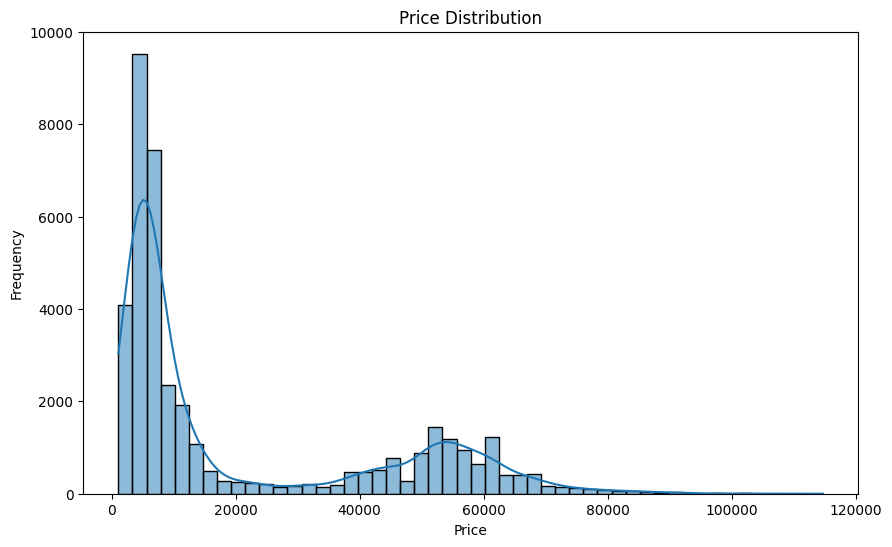

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(train['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Price is right-skewed — typical for price-related data.
Means:
* The distribution of the price values is not symmetrical.

* Instead, the majority of prices are clustered toward the lower end, but there are some very high prices that stretch the distribution to the right (positive side).

* This creates a long tail on the right, which is why it's called "right-skewed" or "positively skewed".

  

Text(0.5, 1.0, 'Days Left Before Flight Distribution')

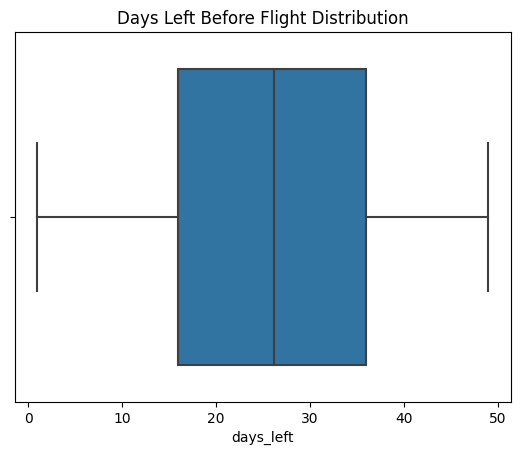

In [12]:
sns.boxplot(x=train['days_left'])
plt.title('Days Left Before Flight Distribution')

**Distribution of Days Left Before Flight¶**
To understand how far in advance tickets are usually booked, we visualize the days_left column using a boxplot. This helps us identify the central tendency and any potential outliers in advance booking patterns.

Most passengers book flights 10 to 40 days in advance.

Booking habits are evenly spread around the median.

we do not need outlier removal for this column — days_left is well-behaved.

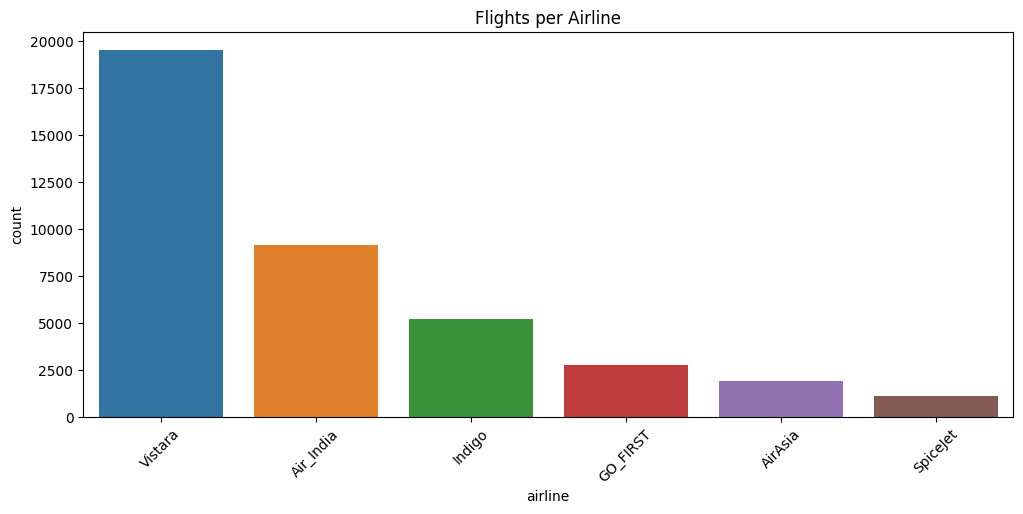

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(data=train, x='airline', order=train['airline'].value_counts().index)
plt.title('Flights per Airline')
plt.xticks(rotation=45)
plt.show()

Flights per Airline¶
Next, we analyze how many flights each airline contributes to the dataset. This can reveal class imbalance, which is important for model performance—especially when categorical variables are encoded.

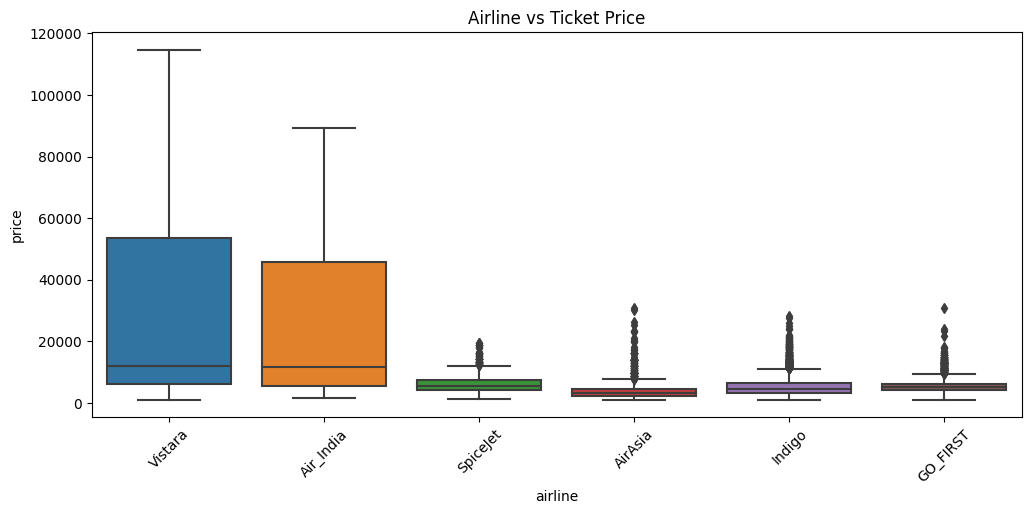

In [14]:
plt.figure(figsize=(12,5))
sns.boxplot(data=train, x='airline', y='price')
plt.title('Airline vs Ticket Price')
plt.xticks(rotation=45)
plt.show()

** Insights:**
1. Vistara and Air India:
These two airlines have much higher ticket price variability.

Their median prices are higher than other airlines.

The boxes are tall, meaning a wide interquartile range (IQR), indicating variability in pricing.

Presence of extreme outliers — possibly business class or international flights.

2. SpiceJet, AirAsia, Indigo, GO_FIRST:
These are low-cost carriers, as seen by their lower median prices and tighter price ranges.

Smaller IQRs suggest more consistent pricing.

However, they still show some outliers, which may be for longer routes or last-minute bookings.

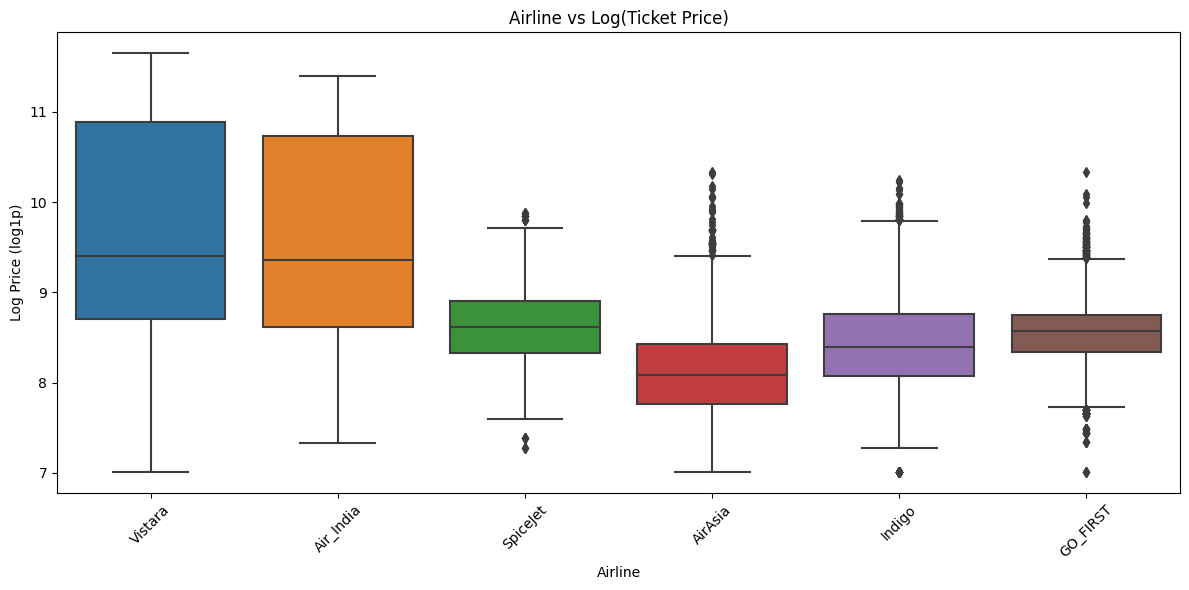

In [15]:
df=train.copy()
df['log_price'] = np.log1p(df['price'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='airline', y='log_price')
plt.title("Airline vs Log(Ticket Price)")
plt.xticks(rotation=45)
plt.ylabel("Log Price (log1p)")
plt.xlabel("Airline")
plt.tight_layout()
plt.show()

After log transformation:

The spread is reduced.

The data appears more symmetric.

Outliers are still visible, but they don’t distort the plot as much.

Text(0.5, 1.0, 'Class vs Price')

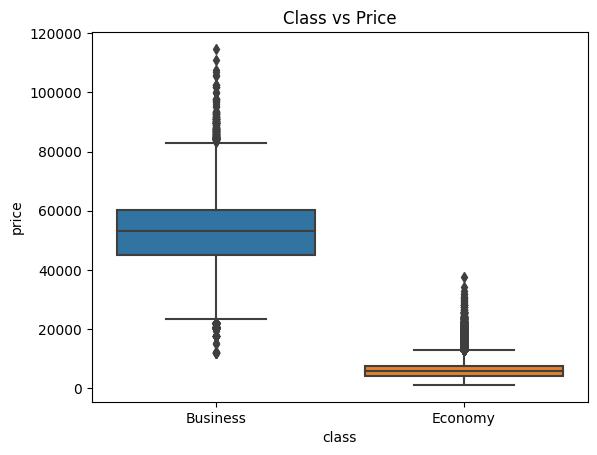

In [16]:
sns.boxplot(data=train, x='class', y='price')
plt.title("Class vs Price")

Business class flights are significantly more expensive than economy.

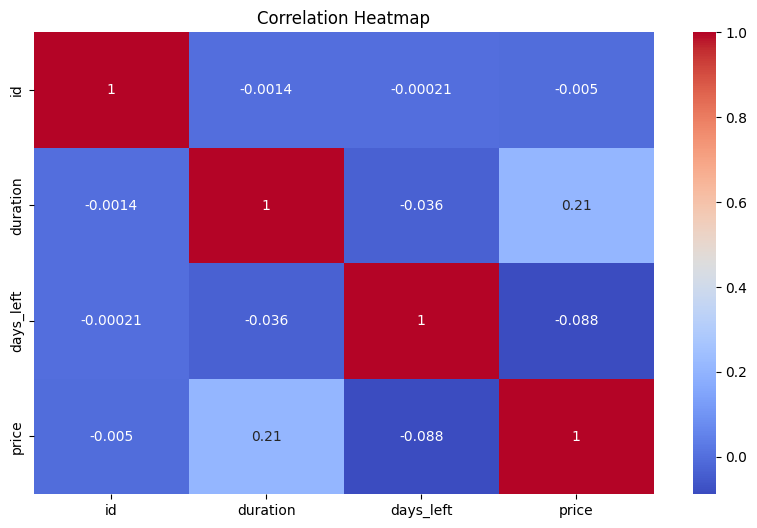

In [17]:
# Only for numeric features
numeric_features = train.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Helps to find relationships between numerical features like days_left, duration, and price
It shows how strongly and in what direction two numeric variables are related.

Values range from -1 to 1:

1 → Perfect positive correlation (when one increases, the other does too).

-1 → Perfect negative correlation (when one increases, the other decreases).

0 → No correlation.

**duration vs price**
Small positive correlation → Longer flight durations slightly increase ticket price

days_left vs price:Slight negative correlation → More days left before the flight tends to reduce the price (expected).

duration vs days_left:No significant relationship — makes sense as flight length isn't related to when it’s booked.

duration affects price somewhat — longer trips may cost more.

days_left has a weak inverse relationship — tickets booked early tend to be cheaper.

**No strong correlations here — so ML models will need more than just these numeric features (e.g., use categorical ones like airline, class, etc.).**



# Identify and handle outliers

,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left,price
0,0,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,11.08,40.0,64173
1,1,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,Economy,16.08,26.0,4357
2,2,SpiceJet,SG-8107,Delhi,Early_Morning,zero,Morning,Chennai,Economy,2.92,25.0,3251
3,3,Vistara,0.00E+00,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.50,22.0,1776
4,4,Air_India,AI-569,Chennai,Early_Morning,one,Morning,Bangalore,Economy,4.83,20.0,3584


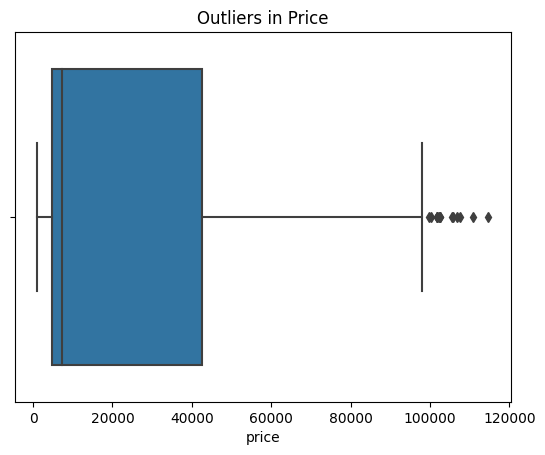

In [18]:
sns.boxplot(x=train['price'])
plt.title("Outliers in Price")
train.head()

Outliers in Ticket Price¶
This boxplot shows the distribution of ticket prices and helps identify any extreme values (outliers) in the dataset.
Box (Middle part): This represents the interquartile range (IQR) — from the 25th percentile (Q1) to the 75th percentile (Q3).

Line inside the box: The median (50th percentile) ticket price.

"Whiskers": These usually extend to Q1 - 1.5×IQR and Q3 + 1.5×IQR.

Dots beyond the whiskers: These are outliers, i.e., unusually high prices in dataset

In [19]:

# Remove outliers in price using IQR
Q1 = train['price'].quantile(0.25)
Q3 = train['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("\nUpper bound :",upper)
print("\nLower bound :",lower)

# Identify outliers
outliers = df[(df['price'] < lower) | (df['price'] > upper)]

# Count of outliers
print("Number of outliers:", outliers.shape[0])


# Filter dataset
train = train[(train['price'] >= lower) & (train['price'] <= upper)]


#droping id and flight from both sets of data , not predictive
train.drop(columns=['id', 'flight'], inplace=True)
test.drop(columns=['id', 'flight'], inplace=True)




Upper bound : 99119.125

Lower bound : -51979.875
Number of outliers: 14


**1. Handling Missing Values¶**
The duration column had several missing entries. Since it’s a numeric feature, we fill these missing values with the median, which is robust to outliers.

**2. Outlier Removal (Using IQR Method)**

Some ticket prices are extremely high, likely due to luxury bookings or data errors. These can negatively affect model performance. We use the Interquartile Range (IQR) method to remove outliers.


In [20]:
original_train=pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv")
original_test=pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv")


In [21]:
print("Original train dataset size:", original_train.shape[0])
print("Original test dataset size:", original_test.shape[0])
print("Cleaned train dataset size:", train.shape[0])
print("Cleaned test dataset size:", test.shape[0])

Original train dataset size: 40000
Original test dataset size: 10000
Cleaned train dataset size: 39666
Cleaned test dataset size: 10000


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso , SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

** Understanding why do we need all these imports **


**from sklearn.model_selection import train_test_split**

✅ Purpose:
To split your dataset into training and testing sets.

🧠 Why it’s important:

You train your model on one part (training set).

You test how well it generalizes on unseen data (test set).

Prevents overfitting and gives a reliable performance estimate.


**from sklearn.impute import SimpleImputer**
✅ Purpose:
To fill in missing values.

🧠 Why it’s important:

ML models can’t handle NaN values.

You can:

Fill numeric columns with mean/median

Fill categorical columns with most frequent category

**from sklearn.pipeline import Pipeline**
✅ Purpose:
To chain preprocessing and modeling steps into a single object.

🧠 Why it’s important:

Keeps your code clean and organized.

Ensures all steps (like scaling, encoding) are applied consistently during training and prediction.

Makes deployment easier 

 **from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler**
a. OneHotEncoder
✅ Converts categorical variables into binary (0/1) columns.

Good for nominal data (e.g., 'airline', 'source').

b. OrdinalEncoder
✅ Converts ordinal categorical data into numeric rankings.

Good for ordered data like ["Low", "Medium", "High"].

c. StandardScaler
✅ Standardizes numeric features by removing the mean and scaling to unit variance.

Makes sure all numeric features have similar scale, especially important for linear models or clustering.



**from sklearn.compose import ColumnTransformer**
✅ Purpose:
To apply different preprocessing pipelines to different column types (e.g., numeric vs categorical).

🧠 Why it’s important:

You can’t apply the same transformation to all columns.

It separates the logic:

Numeric: impute missing values, scale

Categorical: impute missing values, encode

Think of it like a multi-pipeline manager for different column types.

**from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor**

✅ Purpose:
This is the actual machine learning model you’ll train to predict ticket prices.

🧠 Why Random Forest?

Works well with both categorical and numeric features.

Handles non-linear relationships.

Robust to outliers and missing data (to some extent).


**from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score**
✅ Purpose:
To evaluate how well your model predicts on the test set.

🧠 Why it's useful:

Measures the average squared difference between actual and predicted values.

Lower value = better performance.

It's a standard metric for regression tasks.

In [23]:
#            ┌────────────────────┐
#            │    Raw Dataset    │
#            └────────────────────┘
#                      │
#                      ▼
#         ┌──────────────────────────────┐
#         │ Split into Train/Test Sets   │ ← train_test_split
#         └──────────────────────────────┘
#                      │
#           ┌──────────┴──────────┐
#           ▼                     ▼
# ┌─────────────────┐     ┌─────────────────────┐
# │ Numeric Columns  │     │ Categorical Columns │
# └─────────────────┘     └─────────────────────┘
#           │                     │
#           ▼                     ▼
# ┌─────────────────┐     ┌──────────────────────────────┐
# │ SimpleImputer   │     │ SimpleImputer (most_frequent)│
# │ (median/mean)   │     └──────────────────────────────┘
# └─────────────────┘                 │
#           │                         ▼
#           ▼               ┌─────────────────────┐
# ┌────────────────────┐   │ OneHotEncoder        │
# │ StandardScaler      │   └─────────────────────┘
# └────────────────────┘                 │
#           │                            │
#           └────────┬──────────────┬────┘
#                    ▼              ▼
#            ┌──────────────────────────────┐
#            │ ColumnTransformer            │
#            │ Combines Num + Cat Pipelines │
#            └──────────────────────────────┘
#                              │
#                              ▼
#               ┌────────────────────────────┐
#               │   RandomForestRegressor    │
#               └────────────────────────────┘
#                              │
#                              ▼
#                 ┌────────────────────────┐
#                 │ Predict + Evaluate     │
#                 │ (mean_squared_error)   │
#                 └────────────────────────┘


In [24]:
#train_test_split 
target = 'price'
# train=train.drop(columns='log_price')
X = train.drop(columns=[target])
y = train[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Numerical features and Encode Categorical features

In [25]:
# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print("numeric_features: ",numeric_features)
print("categorical_features :",categorical_features)

numeric_features:  ['duration', 'days_left']
categorical_features : ['airline', 'source', 'departure', 'stops', 'arrival', 'destination', 'class']


In [26]:
ordinal_cols = ['stops', 'class']  # 'stops' has a clear order (0, 1, 2), 'class' can be ordered (Economy < Business)
nominal_cols = [col for col in categorical_features if col not in ordinal_cols]


In [27]:
#Create preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

**Pipeline([...])**
→ Creates a sequence of steps to automatically apply to numeric columns during model training or prediction.

**('imputer', SimpleImputer(strategy='median'))**
→ This fills (imputes) any missing values (NaNs) in numeric columns using the median of that column.

('scaler', StandardScaler())
→ This standardizes each numeric column by:
X(scaled)=(x-mean)/std
 
The result: each column has mean = 0 and std = 1

This is especially helpful for models that are sensitive to feature scale (e.g., Linear Regression, SVR).

**('imputer', SimpleImputer(strategy='most_frequent'))**

Fills in missing values (NaNs) in categorical columns.

Uses the most frequent (mode) value of the column.

**('onehot', OneHotEncoder(handle_unknown='ignore'))**

Converts categorical text values into binary vectors (0s and 1s).

For example, a class column with ['Economy', 'Business']


In [28]:
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('ord', ordinal_pipeline, ordinal_cols),
    ('nom', nominal_pipeline, nominal_cols)
])

**ColumnTransformer**
It lets you apply different preprocessing steps to different columns in your dataset — all in a single, unified transformer.

🔍 Step-by-Step Explanation:
('num', numeric_pipeline, numeric_features)

Applies the numeric_pipeline (impute + scale) to all columns in numeric_features.

('cat', categorical_pipeline, categorical_features)

Applies the categorical_pipeline (impute + one-hot encode) to all columns in categorical_features.



# Model Building

In [29]:

# Define all models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "SGD Regressor": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()

}

# Loop through models and evaluate
for name, model in models.items():
    print(f"\n🔁 Training and Evaluating: {name}")
    
    # Build full pipeline with the model
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit pipeline
    model_pipeline.fit(X_train, y_train)
    
    # Predict (in log scale)
    y_pred = model_pipeline.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"✅ RMSE: ₹{rmse:.2f}")
    print(f"✅ MAE:  ₹{mae:.2f}")
    print(f"✅ R²:   {r2:.4f}")



🔁 Training and Evaluating: Linear Regression
✅ RMSE: ₹6787.91
✅ MAE:  ₹4573.51
✅ R²:   0.9100

🔁 Training and Evaluating: Lasso Regression
✅ RMSE: ₹6787.87
✅ MAE:  ₹4573.39
✅ R²:   0.9100

🔁 Training and Evaluating: SGD Regressor
✅ RMSE: ₹6793.75
✅ MAE:  ₹4598.50
✅ R²:   0.9098

🔁 Training and Evaluating: Decision Tree
✅ RMSE: ₹5272.45
✅ MAE:  ₹2497.63
✅ R²:   0.9457

🔁 Training and Evaluating: Random Forest
✅ RMSE: ₹3853.38
✅ MAE:  ₹2103.65
✅ R²:   0.9710

🔁 Training and Evaluating: Gradient Boosting
✅ RMSE: ₹5083.39
✅ MAE:  ₹3054.18
✅ R²:   0.9495

🔁 Training and Evaluating: XGBoost
✅ RMSE: ₹4346.39
✅ MAE:  ₹2558.66
✅ R²:   0.9631

🔁 Training and Evaluating: K-Nearest Neighbors
✅ RMSE: ₹9555.34
✅ MAE:  ₹5651.27
✅ R²:   0.8216


**'preprocessor', preprocessor**
This applies the ColumnTransformer we built earlier.

It:

Imputes missing numeric/categorical values

Scales numeric features

One-hot encodes categorical features

**2. 'model', RandomForestRegressor(...)**
After preprocessing, the cleaned/transformed data goes into a Random Forest regression model.

random_state=42 ensures reproducibility (same results every run).

In [30]:
# import matplotlib.pyplot as plt

# # Model performance (name, RMSE, R2)
# results = {
#     'Linear': (8007.53, 0.8751),
#     'Lasso': (11516.75, 0.7416),
#     'SGD': (8165.00, 0.8701),
#     'Decision Tree': (4985.18, 0.9516),
#     'Random Forest': (3895.63, 0.9704),
#     'Gradient Boosting': (5401.77, 0.9432),
#     'XGBoost': (4575.71, 0.9592),
#     'KNN': (10884.85, 0.7692)
# }

# # Extract for plotting
# models = list(results.keys())
# rmse = [v[0] for v in results.values()]
# r2 = [v[1] for v in results.values()]

# # Plot RMSE
# plt.figure(figsize=(10, 5))
# plt.bar(models, rmse, color='skyblue')
# plt.ylabel('RMSE (₹)')
# plt.title('Model Comparison - RMSE')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # Plot R²
# plt.figure(figsize=(10, 5))
# plt.bar(models, r2, color='orange')
# plt.ylabel('R² Score')
# plt.title('Model Comparison - R²')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


**Top Performing Models:**
1. Random Forest
2. XGBoost
3. Gradient Boosting


# Hyperparameter Tuning

In [31]:
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV


# Define hyperparameter grids
rf_params = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5]
}

# For XGBoost inside Pipeline
xgb_params = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
}

gb_params = {
    'model__n_estimators': [100, 150],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}




rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42, verbosity=0))
])

gb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Create RandomizedSearchCV objects
rf_search = RandomizedSearchCV(rf_pipe, rf_params, n_iter=5, scoring='r2', cv=2, verbose=1, random_state=42, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb_pipe, xgb_params, n_iter=5, scoring='r2', cv=2, verbose=1, random_state=42, n_jobs=-1)
gb_search = RandomizedSearchCV(gb_pipe, gb_params, n_iter=5, scoring='r2', cv=2, verbose=1, random_state=42, n_jobs=-1)

# Fit the models
rf_search.fit(X_train, y_train)
xgb_search.fit(X_train, y_train)
gb_search.fit(X_train, y_train)

# Print best parameters
print("\n✅ Best Random Forest Params:", rf_search.best_params_)
print("✅ Best XGBoost Params:", xgb_search.best_params_)
print("✅ Best Gradient Boosting Params:", gb_search.best_params_)


def evaluate_model(search, name):
    y_pred = search.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n📊 {name} Evaluation:")
    print(f"✅ RMSE: ₹{rmse:.2f}")
    print(f"✅ MAE:  ₹{mae:.2f}")
    print(f"✅ R²:   {r2:.4f}")

# Run evaluation
evaluate_model(rf_search, "Random Forest")
evaluate_model(xgb_search, "XGBoost")
evaluate_model(gb_search, "Gradient Boosting")

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits

✅ Best Random Forest Params: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_depth': None}
✅ Best XGBoost Params: {'model__n_estimators': 100, 'model__max_depth': 5, 'model__learning_rate': 0.1}
✅ Best Gradient Boosting Params: {'model__n_estimators': 150, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': 5, 'model__learning_rate': 0.1}

📊 Random Forest Evaluation:
✅ RMSE: ₹3853.38
✅ MAE:  ₹2103.65
✅ R²:   0.9710

📊 XGBoost Evaluation:
✅ RMSE: ₹4555.40
✅ MAE:  ₹2705.92
✅ R²:   0.9595

📊 Gradient Boosting Evaluation:
✅ RMSE: ₹4428.51
✅ MAE:  ₹2632.99
✅ R²:   0.9617


# Random Forest and XGBoost are our best performing model
selecting random forest.

In [32]:
y_pred_unseen = rf_search.predict(test)

# Convert predictions back to original price scale


In [33]:
submission=pd.DataFrame({'id':range(0,test.shape[0]),'price':y_pred_unseen})
submission.to_csv("submission.csv",index=False)